In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def detectEdges(path):
    image = cv2.imread(path) 
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    gaussianned = cv2.GaussianBlur(grayscale, (3,3), 0) 
    edger = cv2.Canny(gaussianned, 180, 255) 

    return edger

In [15]:
def comparesEdges(image, imagetoo):
    difference = np.sum(np.abs(image - imagetoo))
    return difference

In [17]:
def closestShapeFinder(imgPath, imagesPaths):
    imgEdge = detectEdges(imgPath)

    otherEdges = [detectEdges(path) for path in imagesPaths]

    similarities = [comparesEdges(imgEdge, ref_edge) for ref_edge in otherEdges]

    closestOne = np.argmin(similarities)

    return closestOne

In [16]:
images = [
    '../PRODIGY_ML_04/Training/c/frame_01_09_0001.png',
    '../PRODIGY_ML_04/Training/fist/frame_01_03_0001.png',
    '../PRODIGY_ML_04/Training/ok/frame_01_07_0001.png',
    '../PRODIGY_ML_04/Testing/frame_00_09_0029.png'
]

The closest shape to the fourth image is: ../PRODIGY_ML_04/Training/c/frame_01_09_0001.png


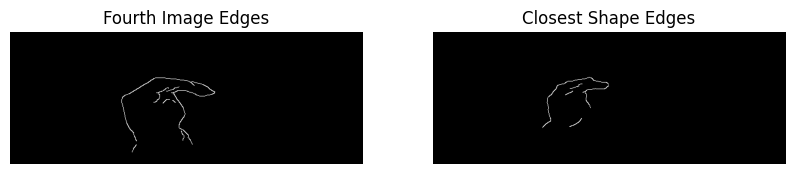

In [18]:
closestOne = closestShapeFinder(images[3], images[:3])

pather = images[closestOne]
print(f"The closest shape to the fourth image is: {pather}")

imgEdge = detectEdges(images[3])
closestEdge = detectEdges(pather)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgEdge, cmap='gray')
plt.title('Fourth Image Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closestEdge, cmap='gray')
plt.title('Closest Shape Edges')
plt.axis('off')

plt.show()
